10. Design an experiment to compare the performance of AdaBoost and XGBoost algorithms on
a binary classification task using a dataset of your choice. Write Python code to implement
both algorithms and evaluate their performance using appropriate evaluation metrics.

In [1]:
# Required Libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [3]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [5]:
# ----------------- AdaBoost -----------------
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)
y_prob_ada = ada_model.predict_proba(X_test)[:, 1]

In [6]:
# ----------------- XGBoost -----------------
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]


/home/anvitha/jupyter_demo/notebookenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [23:23:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [7]:
# ----------------- Evaluation Function -----------------
def evaluate_model(name, y_true, y_pred, y_prob):
    print(f"\n{name} Classification Report")
    print("-" * 30)
    print(classification_report(y_true, y_pred))
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_true, y_prob):.4f}")


In [8]:
# Evaluate both models
evaluate_model("AdaBoost", y_test, y_pred_ada, y_prob_ada)
evaluate_model("XGBoost", y_test, y_pred_xgb, y_prob_xgb)



AdaBoost Classification Report
------------------------------
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Accuracy: 0.9737
Precision: 0.9722
Recall: 0.9859
F1 Score: 0.9790
ROC-AUC: 0.9944

XGBoost Classification Report
------------------------------
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy: 0.9561
Precision: 0.9583
Recall: 0.9718
F1 Score: 0.9650
ROC-AUC: 0.9908


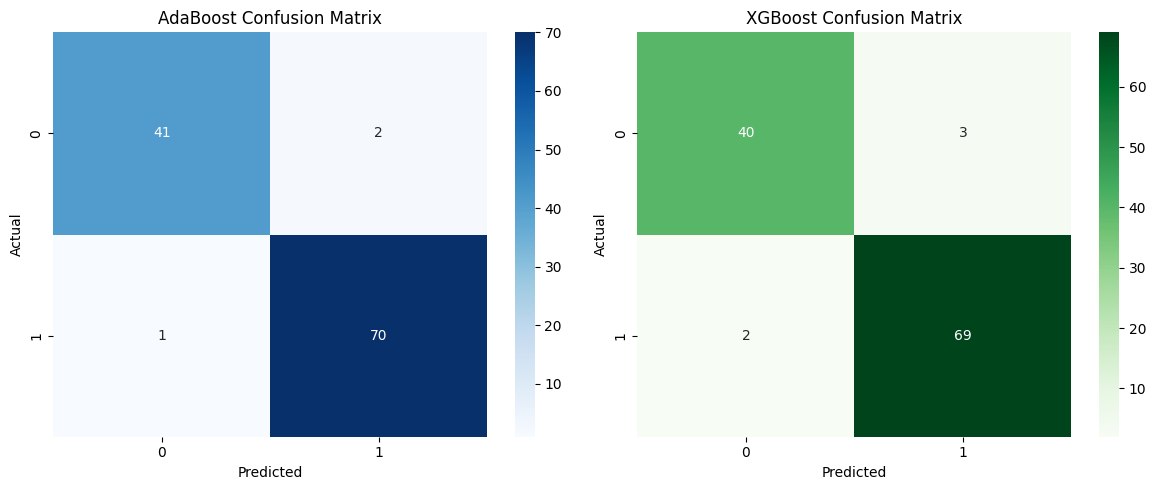

In [9]:
# ----------------- Confusion Matrices -----------------
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_ada), annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title("AdaBoost Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', ax=axes[1], cmap='Greens')
axes[1].set_title("XGBoost Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()


In [2]:
!pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 3.5 MB/s eta 0:00:00m eta 0:00:010:00:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.4/322.4 MB 2.5 MB/s eta 0:00:00m eta 0:00:010:00:03

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
